### Code to run CHIPS for a specific event and validate against existing model outputs

In [1]:
# Import lib
import cv2
import datetime as dt
from argparse import Namespace
import json

# Import modules
import sys
sys.path.extend(["py/"])
from chips_fits import CHIPS

In [2]:
def setup(args, local="py/config/config.json"):
    """
    Load local parameters
    """
    with open(local, "r") as f: o = json.loads("\n".join(f.readlines()))
    for k in o.keys():
        if not hasattr(args, k) and isinstance(o[k], dict): setattr(args, k, Namespace(**o[k]))
        elif not hasattr(args, k): setattr(args, k, o[k])
    return args

# Setup run parameters
args = Namespace()
args.resolution = 4096
args.wavelength = 193
args.date = dt.datetime(2018,5,30,12)
args.apply_psf = False
args.clear = True
args = setup(args)

In [3]:
# Run simulation
#CHIPS(args)

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.utils.data import download_file
import sunpy.map
import sunpy.io

In [23]:
filename = download_file(
    'https://sdo.gsfc.nasa.gov/assets/img/synoptic/AIA0193/CR2205.fits', cache=True)
data, header = sunpy.io.fits.read(filename)[0]
header['cunit1'] = 'arcsec'
header['cunit2'] = 'arcsec'
syn_map = sunpy.map.Map(data, header)


ORIGIN  ='SDO/JSOC-SDP'                                                          [astropy.io.fits.card]
TELESCOP='SDO/AIA_2'                                                             [astropy.io.fits.card]


In [24]:
syn_map.plot_settings['cmap'] = 'sdoaia193'

 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


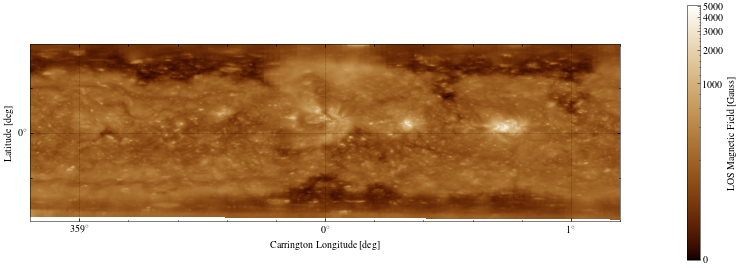

In [25]:
fig = plt.figure(figsize=(12, 5))
axes = plt.subplot(projection=syn_map)
#im = syn_map.plot()
axes.imshow(np.log10(syn_map.data), cmap="sdoaia193")
# Set up the Sine Latitude Grid
x = axes.coords[0]
y = axes.coords[1]

x.set_coord_type('longitude', coord_wrap=360.)
y.set_coord_type('latitude')

x.set_major_formatter('dd')
y.set_major_formatter('dd')

x.set_axislabel("Carrington Longitude [deg]")
y.set_axislabel("Latitude [deg]")

x.set_ticks(color='black', exclude_overlapping=True)
y.set_ticks(color='black', exclude_overlapping=True)

axes.coords.grid(color='black', alpha=0.6, linestyle='dotted', linewidth=0.5)

cb = plt.colorbar(im, fraction=0.019, pad=0.1)
cb.set_label("LOS Magnetic Field [Gauss]")

# Another horrible hack to make the ticks draw on the RHS
axes.set_ylim((1, syn_map.data.shape[0] - 1))
#plt.title("{} {}-{}".format(syn_map.meta['content'], syn_map.meta['CAR_ROT'],
#                            syn_map.meta['CAR_ROT'] + 1))

plt.show()